   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

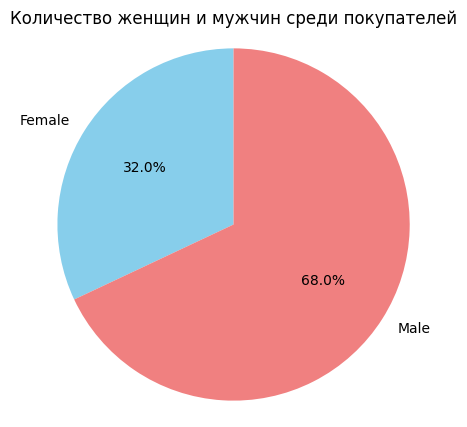


 2. Используемые способы оплаты
('Bank Transfer', 612)
('Cash', 670)
('Credit Card', 671)
('Debit Card', 636)
('PayPal', 677)
('Venmo', 634)


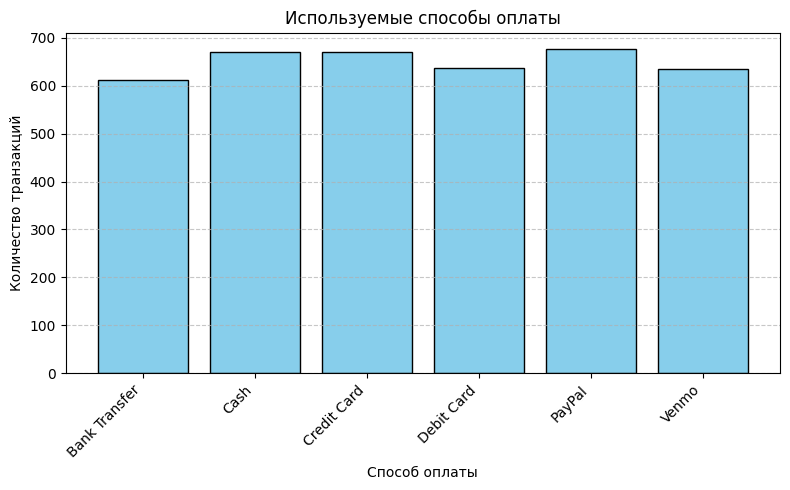


 3. Максимальная сумма покупки
(100,)

 4. Сколько раз был приобретен каждый вид товара (сортировка по убыванию)
('Pants', 171)
('Jewelry', 171)
('Blouse', 171)
('Shirt', 169)
('Dress', 166)
('Sweater', 164)
('Jacket', 163)
('Sunglasses', 161)
('Coat', 161)
('Belt', 161)
('Sandals', 160)
('Socks', 159)
('Skirt', 158)
('Shorts', 157)
('Scarf', 157)
('Hat', 154)
('Handbag', 153)
('Hoodie', 151)
('Shoes', 150)
('T-shirt', 147)
('Sneakers', 145)
('Boots', 144)
('Backpack', 143)
('Gloves', 140)
('Jeans', 124)

 5. Общая сумма продаж для каждого города
('Alabama', 5261)
('Alaska', 4867)
('Arizona', 4326)
('Arkansas', 4828)
('California', 5605)
('Colorado', 4222)
('Connecticut', 4226)
('Delaware', 4758)
('Florida', 3798)
('Georgia', 4645)
('Hawaii', 3752)
('Idaho', 5587)
('Illinois', 5617)
('Indiana', 4655)
('Iowa', 4201)
('Kansas', 3437)
('Kentucky', 4402)
('Louisiana', 4848)
('Maine', 4388)
('Maryland', 4795)
('Massachusetts', 4384)
('Michigan', 4533)
('Minnesota', 4977)
('Mississippi', 48

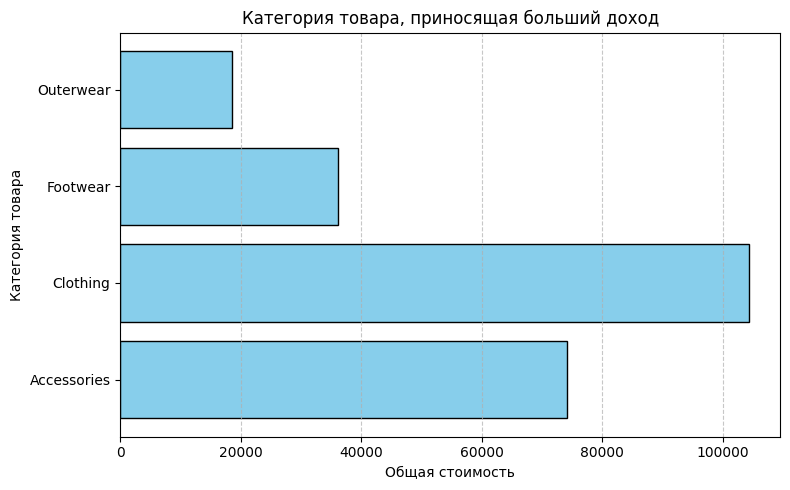

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


# Загрузка CSV в DataFrame
df = pd.read_csv('shopping_behavior_updated.csv')

# Информация о данных
print(df.head())
print(df.info())
print(df.describe())

# Создание соединения с базой данных
conn = sqlite3.connect('shopping_behavior_updated.db')
cursor = conn.cursor()

#Экспорт DataFrame в таблицу SQLite
df.to_sql('shopping_behavior_updated', conn, if_exists='replace', index=False)



#SQL-ЗАПРОСЫ И ВИЗУАЛИЗАЦИЯ ДАННЫХ

print('\n 1. Количество женщин и мужчин среди покупателей')
cursor.execute("SELECT Gender, Count(Gender) FROM shopping_behavior_updated GROUP BY Gender")
result = cursor.fetchall()
for row in result:
    print(row)

#Визуализация
genders = [row[0] for row in result]
counts = [row[1] for row in result]
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=genders, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Количество женщин и мужчин среди покупателей')
plt.axis('equal')
plt.show()


print('\n 2. Используемые способы оплаты')
cursor.execute("SELECT [Payment Method], Count([Payment Method]) FROM shopping_behavior_updated GROUP BY [Payment Method]")
result = cursor.fetchall()
for row in result:
    print(row)

#Визуализация
methods = [row[0] for row in result]
counts = [row[1] for row in result]
plt.figure(figsize=(8, 5))
plt.bar(methods, counts, color='skyblue', edgecolor='black')
plt.xlabel('Способ оплаты')
plt.ylabel('Количество транзакций')
plt.title('Используемые способы оплаты')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print('\n 3. Максимальная сумма покупки')
cursor.execute("SELECT MAX([Purchase Amount (USD)]) FROM shopping_behavior_updated")
result = cursor.fetchall()
for row in result:
    print(row)


print('\n 4. Сколько раз был приобретен каждый вид товара (сортировка по убыванию)')
cursor.execute("SELECT [Item Purchased], Count([Item Purchased]) FROM shopping_behavior_updated GROUP BY [Item Purchased] ORDER BY Count([Item Purchased]) DESC ")
result = cursor.fetchall()
for row in result:
    print(row)


print('\n 5. Общая сумма продаж для каждого города')
cursor.execute("SELECT Location, SUM([Purchase Amount (USD)]) AS SumCity FROM shopping_behavior_updated GROUP BY Location")
result = cursor.fetchall()
for row in result:
    print(row)

print('\n 6. Города, в которых общая сумма продаж больше 5000')
cursor.execute("SELECT Location, SUM([Purchase Amount (USD)]) AS SumCity FROM shopping_behavior_updated GROUP BY Location HAVING SumCity > 5000")
result = cursor.fetchall()
for row in result:
    print(row)


print('\n 7. Товар, который стоит больше 90 и розового цвета')
cursor.execute("SELECT [Item Purchased] FROM shopping_behavior_updated WHERE [Purchase Amount (USD)] > 90 AND Color = 'Pink'")
result = cursor.fetchall()
for row in result:
    print(row)


print('\n 8. Общая стоимость товара по категориям')
cursor.execute("SELECT Category, SUM([Purchase Amount (USD)]) FROM shopping_behavior_updated GROUP BY Category")
result = cursor.fetchall()
for row in result:
    print(row)

#Визуализация
methods = [row[0] for row in result]
counts = [row[1] for row in result]
plt.figure(figsize=(8, 5))
plt.barh(methods, counts, color='skyblue', edgecolor='black')
plt.xlabel('Общая стоимость')
plt.ylabel('Категория товара')
plt.title('Категория товара, приносящая больший доход')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Сохранение изменений и закрытие соединения
conn.commit()
conn.close()


